# Heatmap

## Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import zipfile

In [2]:
cv2.__version__

'4.10.0'

## Extracting files

In [3]:
pose_path = "pose.zip"
zip_object = zipfile.ZipFile(file = pose_path, mode = "r") 
zip_object.extractall("./")

## Defining the path to the models

In [5]:
#Architecture of the neural network
proto_files = "pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt"

#The weights of the neural network
weights_file = "pose/body/mpi/pose_iter_160000.caffemodel"

## Loading an image

In [6]:
img = cv2.imread("people.jpeg")

In [7]:
img.shape

(183, 275, 3)

In [8]:
cv2.imshow('people', img)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()  # Close the window

In [25]:
heigth = img.shape[0]
width = img.shape[1]

## Loading the model

In [26]:
model = cv2.dnn.readNetFromCaffe(proto_files, weights_file)

## Changing the size of the image

In [27]:
new_height = 128
new_width = int((new_height/heigth)*width)

In [65]:
new_width

192

## Converting the imate from cv2 to blob Caffe

In [66]:
blob_entry = cv2.dnn.blobFromImage(image = img, scalefactor = 1.0/255,
                                    size = (new_width, new_height),
                                    mean = (0,0,0), swapRB = False, crop = False)

## Output

In [67]:
model.setInput(blob_entry)
output = model.forward()

In [68]:
output.shape

(1, 44, 16, 24)

In [69]:
output[0].shape

(44, 16, 24)

## Confidence Map

In [81]:
point = 0 #head
confidence_map = output[0, point, :]
confidence_map = cv2.resize(confidence_map, (width, heigth))

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

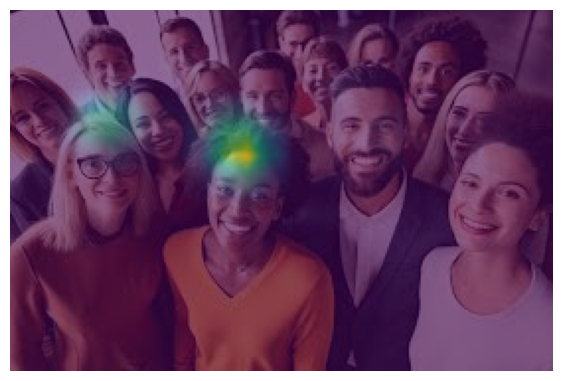

In [82]:
plt.figure(figsize = [7,5])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(confidence_map, alpha = 0.6)
plt.axis("off")

## Afinity Map

In [86]:
point = 16 # afinity between head and neck
confidence_map = output[0, point, :]
confidence_map = cv2.resize(confidence_map, (width, heigth))

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

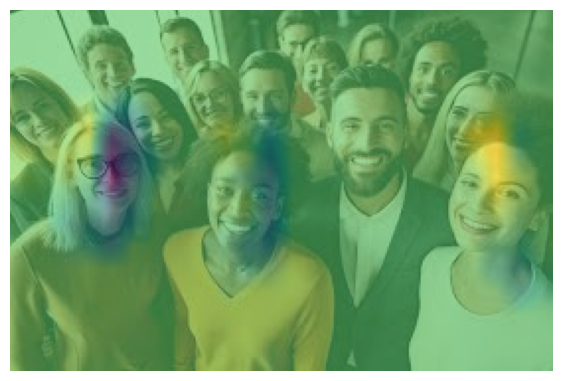

In [87]:
plt.figure(figsize = [7,5])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(confidence_map, alpha = 0.6)
plt.axis("off")